Labelling data to create train and test data sets

In [1]:
# dependencies
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from scipy import stats
import numpy as np
from tqdm import tqdm, trange

In [2]:
# # price data direct to dataframe
# #  yahoo finance
# yf.pdr_override()
# df = pdr.get_data_yahoo('IBM', start='1995-01-01', end='2021-01-01', interval='1d')
# df

In [3]:
# price data from simulation noteboook (real or simulated)
#  'tspattern_data_simulate.ipynb'
df = pd.read_csv('./resources/eurusd_hour_real.csv', index_col=0,parse_dates=True)
df

,Open,High,Low,Close
Date,,,,
2012-03-28 02:00:00,1.33221,1.33319,1.33204,1.33304
2012-03-28 03:00:00,1.33301,1.33304,1.33256,1.33287
2012-03-28 04:00:00,1.33290,1.33338,1.33255,1.33255
2012-03-28 05:00:00,1.33257,1.33348,1.33255,1.33322
2012-03-28 06:00:00,1.33325,1.33353,1.33154,1.33250
...,...,...,...,...
2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713
2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748
2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708


In [4]:
# derive candlestick components from ohlc
#  upper-shadow, lower-shadow, real-body
with tqdm(total=df.shape[0]) as pbar:
    
    for index, row in df.iterrows():
        pbar.update(1)

        # real body - positive=rising / negative=falling
        df.loc[index,'real_body'] = df.loc[index,'Close'] - df.loc[index,'Open']

        # rising candle
        if df.loc[index,'Close'] >= df.loc[index,'Open']: 
            df.loc[index,'upper_shadow'] = df.loc[index,'High'] - df.loc[index,'Close']
            df.loc[index,'lower_shadow'] = df.loc[index,'Open'] - df.loc[index,'Low']

        # falling candle   
        else:
            df.loc[index,'upper_shadow'] = df.loc[index,'Open'] - df.loc[index,'High']
            df.loc[index,'lower_shadow'] = df.loc[index,'Low'] - df.loc[index,'Close']  
        
# tidy up
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})
df['date'] = df.index
df = df[['date', 'open', 'high', 'low', 'close', 'upper_shadow', 'lower_shadow', 'real_body']]
df

100%|██████████| 50000/50000 [00:34<00:00, 1443.87it/s]


,date,open,high,low,close,upper_shadow,lower_shadow,real_body
Date,,,,,,,,
2012-03-28 02:00:00,2012-03-28 02:00:00,1.33221,1.33319,1.33204,1.33304,0.00015,0.00017,0.00083
2012-03-28 03:00:00,2012-03-28 03:00:00,1.33301,1.33304,1.33256,1.33287,-0.00003,-0.00031,-0.00014
2012-03-28 04:00:00,2012-03-28 04:00:00,1.33290,1.33338,1.33255,1.33255,-0.00048,0.00000,-0.00035
2012-03-28 05:00:00,2012-03-28 05:00:00,1.33257,1.33348,1.33255,1.33322,0.00026,0.00002,0.00065
2012-03-28 06:00:00,2012-03-28 06:00:00,1.33325,1.33353,1.33154,1.33250,-0.00028,-0.00096,-0.00075
...,...,...,...,...,...,...,...,...
2020-04-29 18:00:00,2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713,0.00138,0.00009,0.00093
2020-04-29 19:00:00,2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748,0.00075,0.00052,0.00037
2020-04-29 20:00:00,2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708,-0.00041,-0.00017,-0.00039


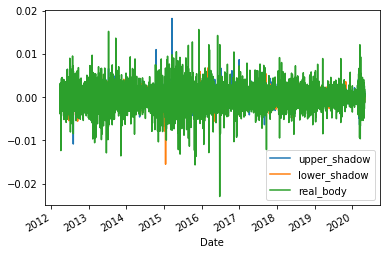

In [5]:
# investigate for outliers
df[['upper_shadow', 'lower_shadow', 'real_body']].plot();

In [6]:
# # remove obvious outliers if any
# df = df[(np.abs(stats.zscore(df['open'])) < 3)]
# df = df[(np.abs(stats.zscore(df['high'])) < 3)]
# df = df[(np.abs(stats.zscore(df['low'])) < 3)]
# df = df[(np.abs(stats.zscore(df['close'])) < 3)]
# df = df[(np.abs(stats.zscore(df['lower_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['upper_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['real_body'])) < 3)]
# df

In [7]:
# # confirm removal of outliers
# df[['upper_shadow', 'lower_shadow', 'real_body']].plot();

In [8]:
# calculate slope and fit of regression
#  for every group of 'periods' closing prices

# initialise
periods = 5
slopeall = []
idxall = []

# loop through all closign prices starting at the 'periods'th
for h in trange(periods, df.shape[0], desc="Generating...", ascii=True):

    # previous 'periods' closing prices
    prev = (df.iloc[h-periods:h,4].values +df.iloc[h-periods:h,1].values) / 2.
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(periods)), prev)
    
    # append results
    slopeall.append([slope, r_value**2])
    idxall.append(df.index[h])

Generating...: 100%|##########| 49995/49995 [00:24<00:00, 2077.04it/s]


In [9]:
# create new column in dataframe - 'slope'
#  fill with categories (positive, neagative, neutral)

# initialise new column in dataframe
df['slope'] = 'neutral'

# loop through all calculated slopes
for i in trange(len(idxall), desc="Generating...", ascii=True):

    # positive slope
    if slopeall[i][0] > 0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'positive'

    # negative slope
    elif slopeall[i][0] < -0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'negative'

#     # no slope
#     else:
#         df.loc[idxall[i+4], 'slope'] = 'neutral'

Generating...: 100%|##########| 49995/49995 [00:20<00:00, 2453.58it/s]


In [10]:
# review counts of each slope category
df['slope'].value_counts()

neutral     23658
negative    13188
positive    13154
Name: slope, dtype: int64

In [11]:
# create new column in dataframe - 'indicator'
#  fill with categories of candlestick patterns
df['indicator'] = 'neutral'

for i in trange(3, df.shape[0], desc="Generating...", ascii=True):
    
    current = df.iloc[i,:]
    prev = df.iloc[i-1,:]
    prev2 = df.iloc[i-2,:]
    prev3 = df.iloc[i-3,:]
    idx = df.index[i]

    # doji
    if df.loc[idx, 'slope'] == 'negative' and \
        prev['close'] < prev['open'] and \
        abs(current['close'] - current['open']) < 0.01 and \
        current['open'] < prev['close']:
        df.loc[idx,'indicator'] = 'doji-buy'
    
    if df.loc[idx, 'slope'] == 'positive' and \
        prev['close'] > prev['open'] and \
        abs(current['close'] - current['open']) < 0.01 and \
        current['open'] > prev['close']:
        df.loc[idx,'indicator'] = 'doji-sell'

#     # harami   
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         prev['close'] < current['low'] and \
#         prev['open'] > current['high']:
#         df.loc[idx,'indicator'] = 'harami-buy'
        
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         prev['close'] > current['high'] and \
#         prev['open'] < current['low']:
#         df.loc[idx,'indicator'] = 'harami-sell'
       
#     # piercing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'piercing-buy'
    
#     # dark cloud
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'darkcloud-sell'
    
#     # morning star
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev2['open'] > prev2['close'] and \
#         current['open'] < current['close'] and \
#         max(prev['close'], prev['open']) < prev2['close'] and \
#         current['open'] > max(prev['close'], prev['open']) and \
#         current['close'] > prev2['close'] + 0.5*(prev2['open']-prev2['close']):
#         df.loc[idx,'indicator'] = 'morningstar-buy'

#     # evening star
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev2['open'] < prev2['close'] and \
#         current['open'] > current['close'] and \
#         min(prev['close'], prev['open']) > prev2['close'] and \
#         current['open'] < min(prev['close'], prev['open']) and \
#         current['close'] < prev2['open'] + 0.5*(prev2['close']-prev2['open']):
#         df.loc[idx,'indicator'] = 'eveningstar-sell'
        
#     # engulfing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev3['open'] > prev3['close'] and \
#         prev2['open'] > prev2['close'] and \
#         prev['open'] > prev['close'] and \
#         current['open'] < current['close'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-buy'
    
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev3['open'] < prev3['close'] and \
#         prev2['open'] < prev2['close'] and \
#         prev['open'] < prev['close'] and \
#         current['open'] > current['close'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-sell'

Generating...: 100%|##########| 49997/49997 [00:42<00:00, 1186.09it/s]


In [12]:
# review counts of each indicator category
df['indicator'].value_counts()

neutral      43583
doji-buy      3330
doji-sell     3087
Name: indicator, dtype: int64

In [13]:
# dataframe to csv
df.to_csv('./resources/eurusd_hour_real_labelled.csv', index=False,)